In [1]:
#Importar librerías 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Crear data frame
iris = pd.read_csv("IRIS.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Revsión del Dataset

In [4]:
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
# Eliminar la 'Iris-virginica'
iris = iris[~(iris['species'] == 'Iris-virginica')]

In [6]:
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor'], dtype=object)

In [7]:
#Eliminar las columnas: 'sepal width' y 'petal width'
iris = iris.drop('sepal_width', axis = 1)

iris = iris.drop('petal_width', axis = 1)


In [8]:
iris

,sepal_length,petal_length,species
0,5.1,1.4,Iris-setosa
1,4.9,1.4,Iris-setosa
2,4.7,1.3,Iris-setosa
3,4.6,1.5,Iris-setosa
4,5.0,1.4,Iris-setosa
...,...,...,...
95,5.7,4.2,Iris-versicolor
96,5.7,4.2,Iris-versicolor
97,6.2,4.3,Iris-versicolor
98,5.1,3.0,Iris-versicolor


In [9]:
# Verificar filas vacías o columnas duplicadas
#print(len(iris[iris.duplicated(subset=['sepal_length', 'petal_length'], keep=False)]))
print (iris.duplicated().sum())

19


In [10]:
# Nos deshacemos de las filas duplicadas
iris = iris.drop_duplicates()

In [11]:
print (iris.duplicated().sum())

0


In [12]:
# Verificar valores nulos:
iris.isnull().sum()

sepal_length    0
petal_length    0
species         0
dtype: int64

In [13]:
iris['species'].value_counts()

species
Iris-versicolor    46
Iris-setosa        35
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

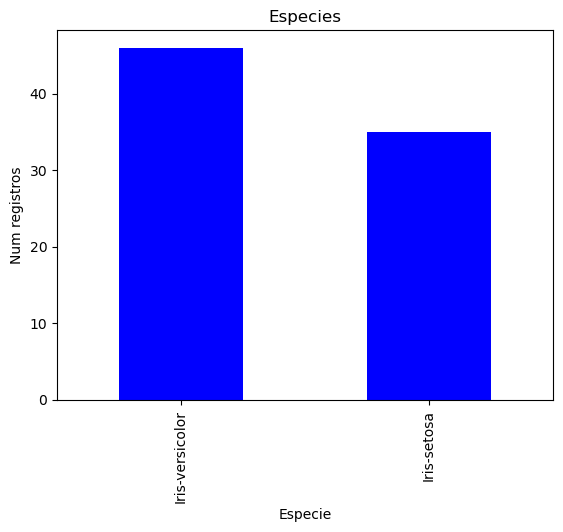

In [14]:
# Graficar la columna 'species'
iris['species'].value_counts().plot(kind='bar', color='b')
plt.title('Especies')
plt.xlabel('Especie')
plt.ylabel('Num registros')
plt.show

Text(0.5, 1.0, 'Tamaño del sépalo')

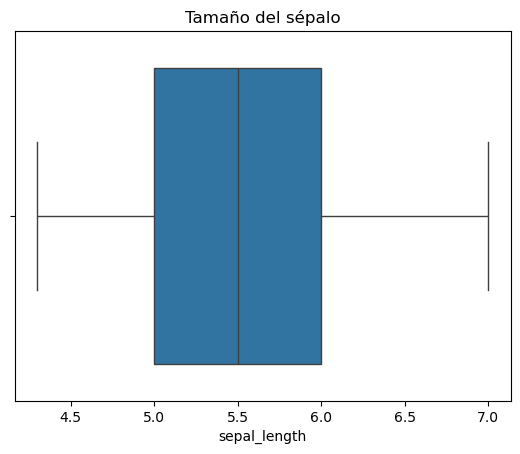

In [15]:
# Revisar Outliers
sns.boxplot( x=iris['sepal_length'] )
plt.title('Tamaño del sépalo')

No parece haber outliers

Text(0.5, 1.0, 'Tamaño del petalo')

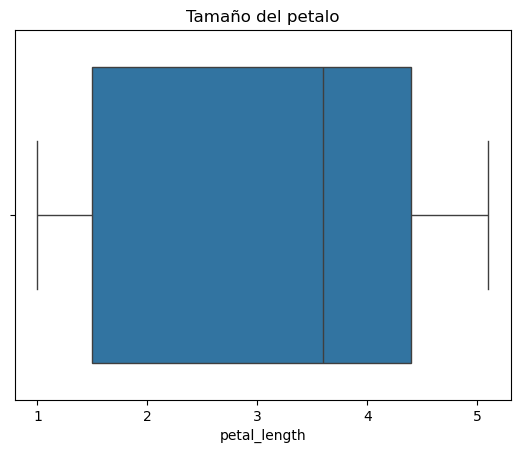

In [17]:
# Revisar Outliers
sns.boxplot( x=iris['petal_length'] )
plt.title('Tamaño del petalo')

No parece haber outliers

In [34]:
# Guardar los datos en un dataset nuevo
iris.to_csv("IRIS_acondicionado.csv",  index=False)
iris = pd.read_csv("IRIS_acondicionado.csv")
iris

,sepal_length,petal_length,species
0,5.1,1.4,Iris-setosa
1,4.9,1.4,Iris-setosa
2,4.7,1.3,Iris-setosa
3,4.6,1.5,Iris-setosa
4,5.0,1.4,Iris-setosa
...,...,...,...
76,5.6,4.2,Iris-versicolor
77,5.7,4.2,Iris-versicolor
78,6.2,4.3,Iris-versicolor
79,5.1,3.0,Iris-versicolor


# Inicio del proceso del Perceptrón del dataset IRIS

In [36]:
#Entradas
inputs = np.array(iris[['sepal_length', 'petal_length']].values)
#Salidas
labels = np.where(iris['species'] == 'Iris-setosa', 1, 0)

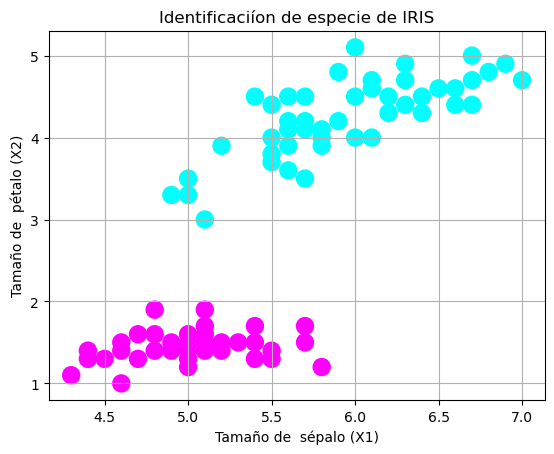

In [38]:
# Graficar los datos para observar si son linealmente separables
plt.scatter(inputs[:,0], inputs[:,1], c = labels, cmap='cool', marker = 'o', s = 150)
plt.title("Identificaciíon de especie de IRIS")
plt.xlabel("Tamaño de  sépalo (X1)")
plt.ylabel("Tamaño de  pétalo (X2)")
plt.grid(True)
plt.show()

In [82]:
# Definición de hiperparámetros 
larning_rate = 0.5 #Aumenté este para que converger más rápido
bias = np.random.rand()
epochs = 10
weights = np.random.rand(2) # No es hiperparámetro


In [42]:
# Crar clase Perceptrón
class Perceptron():
    def __init__(self, inputs, labels, learning_rate, weights, bias, epochs=20):
        self.inputs = inputs
        self.labels = labels
        self.learning_rate = learning_rate
        self.weights = weights
        self.bias = bias
        self. epochs = epochs

    def activation(self, z):
        return 1 if z > 0 else 0

    def predict(self, input_x, weights_ajustados, bias_weights):
        # Calcular la funcion ponderada Z
        z = np.dot(input_x, weights_ajustados) + bias_weights
        # Calcular 'Y' predicha
        y_pred = self.activation(z)
        return y_pred
    
    def fit(self):
        # Abrir un ciclo de acuerdo a las iteraciones de Epochs
        for epoch in range(self.epochs):
            print(f"Epoch {epoch + 1}/{self.epochs}", end = " ")

            #Variable para obtener el error en cada Epoch
            total_error=0
            
            # Abrir otro cclo para reconocer las entradas
            for input, label in zip(self.inputs, self.labels):
                # print(f"Input {input}, Label: {label}")
                # Calcular la funcion ponderada Z
                z = np.dot(input, self.weights) + self.bias
                #Calcular 'y' predicha
                y_pred = self.activation(z)
                # Calcular el error
                error = label - y_pred
                total_error += abs(error)
                # Calcular el delta W
                delta_w = self.learning_rate * error * input
                #Actualizar weigths
                self.weights = self.weights + delta_w
                #Actualizar el bias
                delta_bias = self.learning_rate * error
                self.bias = self.bias + delta_bias            

            #Calcular el error promedio
            average_error = total_error/len(self.labels)
            print(f"Average Error: {average_error}")
            # Detener para no hacer más epochs si el error es 0
            if total_error == 0:
                print("error 0 alcanzado")
                break
        
        # Retornar pesos y bias actualizados        
        return self.weights, self.bias


In [84]:
# Crear el objeto perceptrón
perceptron = Perceptron(inputs, labels, larning_rate, weights, bias, epochs)

# Entrada del perceptron
w,b = perceptron.fit()
print(f"Weigths fit: {w} Bias fit: {b}")

#se detiene antes de alcanzar todos los Epochs definidos ya que incluí 
#una condición en la clase Perceptrón para detener las iteraciones cuando average_error es igual a 0

Epoch 1/10 Average Error: 0.012345679012345678
Epoch 2/10 Average Error: 0.037037037037037035
Epoch 3/10 Average Error: 0.012345679012345678
Epoch 4/10 Average Error: 0.0
error 0 alcanzado
Weigths fit: [ 1.09638066 -2.48807231] Bias fit: 1.414055169268034


In [86]:
# Realizar nuestras presicciones
X1_1= 7.3
X2_1= 4.1
X1_2= 5.4
X2_2= 1.2
X1_3= 1.9
X2_3= 1.1

print(f"[{X1_1},{X2_1}]-->{'Iris-setosa' if perceptron.predict([X1_1,X2_1],w,b) == 1 else 'Iris-versicolor'}")
print(f"[{X1_2},{X1_2}]-->{'Iris-setosa' if perceptron.predict([X1_2,X2_2],w,b) == 1 else 'Iris-versicolor'}")
print(f"[{X1_3},{X2_3}]-->{'Iris-setosa' if perceptron.predict([X1_3,X2_3],w,b) == 1 else 'Iris-versicolor'}")

[7.3,4.1]-->Iris-versicolor
[5.4,5.4]-->Iris-setosa
[1.9,1.1]-->Iris-setosa
